<a href="https://colab.research.google.com/github/taddeseanb/kenya-hub/blob/main/Copy_of_Waterbodies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Waterbodies

* **Products used:** [DE Africa Waterbodies](https://docs.digitalearthafrica.org/en/latest/data_specs/Waterbodies_specs.html)

## Background
The Digital Earth Africa continental Waterbodies Monitoring Service identifies more than 700,000 water bodies from over three decades of satellite observations. This service maps persistent and seasonal water bodies and the change in their water surface area over time. Mapped water bodies may include, but are not limited to, lakes, ponds, man-made reservoirs, wetlands, and segments of some river systems.

On a local, regional, and continental scale, this service helps improve our understanding of surface water dynamics and water availability and can be used for monitoring water bodies such as wetlands, lakes and dams in remote and/or inaccessible locations.

The service offers two products:

* The DE Africa Waterbodies Historical Extent
* The DE Africa Waterbodies Surface Area Change

The DE Africa Waterbodies Historical Extent product is a static polygon-based view of the DE Africa Water Observations from Space All-Time Summary product. The historical extent represents where water has appeared in at least 5% of clear observations since 1984. It is not a capture of a water body’s true extent in any given year, but a record of where water has appeared since 1984. To be captured in the dataset, polygons must have an area of at least 4,500 metres squared (5 Landsat pixels). The historical extent polygons have been derived from the [DE Africa Water Observations from Space All-Time Summary](https://docs.digitalearthafrica.org/en/latest/data_specs/Landsat_WOfS_specs.html#WOfS-All-Time-Summary) product, which provides historical surface water observations across the African continent.

For each water body, the Surface Area Change product provides the percentage of the historical extent that was classified as wet, dry, or invalid, for each [DE Africa Water Observation from Space Feature Layer](https://docs.digitalearthafrica.org/en/latest/data_specs/Landsat_WOfS_specs.html#WOfS-Feature-Layer) scene that captured the water body. This can be used to identify when water bodies are increasing or decreasing in wet surface area.

**Disclaimer: DE Africa Waterbodies Surface Area Change measures the wet surface area of waterbodies as estimated from satellites. This product does not measure depth, volume, purpose of the waterbody, nor the source of the water.**

### Applications

* Identify and analyse persistent and seasonal water bodies
* Water resource management
* Gain insights into the severity and spatial distribution of drought

## Description
This notebook will demonstrate how to load historical extents and wet surface area timeseries from the [DE Africa Waterbodies service](https://docs.digitalearthafrica.org/en/latest/data_specs/Waterbodies_specs.html).

Topics covered include:

1. Getting a list of available polygons in a given area
2. Select and plot a single polygon
3. Plotting the surface area of the polygon over time

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the “Load packages” cell.

### Load packages
Import Python packages that are used for the analysis.

In [ ]:
import matplotlib.pyplot as plt

from deafrica_tools.plotting import display_map
from deafrica_tools.waterbodies import (
    get_geohashes,
    get_waterbodies,
    get_waterbody,
    get_time_series,
    display_time_series,
    plot_last_valid_obs
)

## Analysis parameters

This section defines the analysis parameters, including:

* `lat`, `lon`, `buffer`: center lat/lon and analysis window size for the area of interest (in degrees)

The default area is a water body in Mauritania.

In [ ]:
# Set the central latitude and longitude
lat = 16.158
lon = -12.57

# Set the buffer to load around the central coordinates
buffer = 0.15

# Compute the bounding box coordinates
xlim = (lon-buffer, lon+buffer)
ylim =  (lat+buffer, lat-buffer)

# Preview area on a map
display_map(xlim, ylim)

## Getting data

The `deafrica_waterbodies` module allows you to query water bodies by location or geohash.

### List waterbody polygons in an area
We can get a list of waterbody polygons inside a bounding box of coordinates using `get_waterbodies`.

In [ ]:
# Create a bounding box from study area coordinates
bbox = (xlim[0], ylim[1], xlim[1], ylim[0])

# Select all water bodies located within the bounding box
polygons = get_waterbodies(bbox, crs="EPSG:4326")

In [ ]:
# Return GeoDataFrame with selected water bodies
polygons.head()

,id,wb_id,area_m2,length_m,uid,perim_m,last_obs_date,last_valid_obs_date,last_valid_obs,last_attrs_update_date,geometry
0,DEAfrica_Waterbodies.edygygq73v,54171,8100.0,150.000000,edygygq73v,480.0,2025-08-09,2025-08-01,0.0,2025-08-12,"POLYGON ((-12.7028 16.1467, -12.7016 16.1467, ..."
1,DEAfrica_Waterbodies.edygybgyrw,54166,9000.0,194.154974,edygybgyrw,540.0,2025-08-09,2025-08-01,0.0,2025-08-12,"POLYGON ((-12.7066 16.1335, -12.7066 16.133, -..."
2,DEAfrica_Waterbodies.edygzhnqfu,54173,5400.0,150.000000,edygzhnqfu,420.0,2025-08-09,2025-08-01,0.0,2025-08-12,"POLYGON ((-12.6923 16.1513, -12.6923 16.1511, ..."
3,DEAfrica_Waterbodies.edygzhx18d,54174,13500.0,450.000000,edygzhx18d,960.0,2025-08-09,2025-08-01,0.0,2025-08-12,"POLYGON ((-12.6907 16.1548, -12.6907 16.1511, ..."
4,DEAfrica_Waterbodies.edygzkvsw0,54176,5400.0,120.000000,edygzkvsw0,360.0,2025-08-09,2025-07-24,0.0,2025-08-12,"POLYGON ((-12.682 16.155, -12.682 16.1548, -12..."


The returned geodataframe includes all the water bodies which are located within the bounding box. This dataset contains metadata for each water body in the dataset, including the `id`, unique identifier/geohash (`uid`), `wb_id`, area (`area_m2`), perimeter (`perim_m`), length of the longest side (`length_m`), the last valid observation (`last_valid_obs`), the date of the last valid observation (`last_valid_obs_date`), the date of the last observation (`last_obs`) and the date the last valid observation was updated (`last_attrs_update_date`). See the [Waterbodies Historical Extent documentation](https://docs.digitalearthafrica.org/en/latest/data_specs/Waterbodies_specs.html#Waterbodies-Historical-Extent) for descriptions of each attribute.

### Displaying the polygons

Once the water body polygons are in memory, you can plot them directly, or explore them in an interactive window.

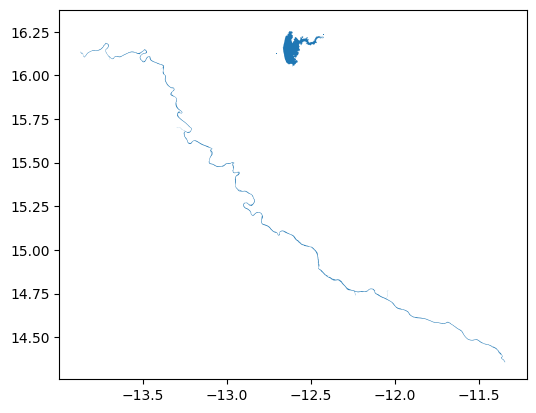

In [ ]:
# Plot the waterbody polygons located within the bounding box
polygons.plot();

In [ ]:
# Explore the waterbody polygons located within the bounding box
polygons.explore()

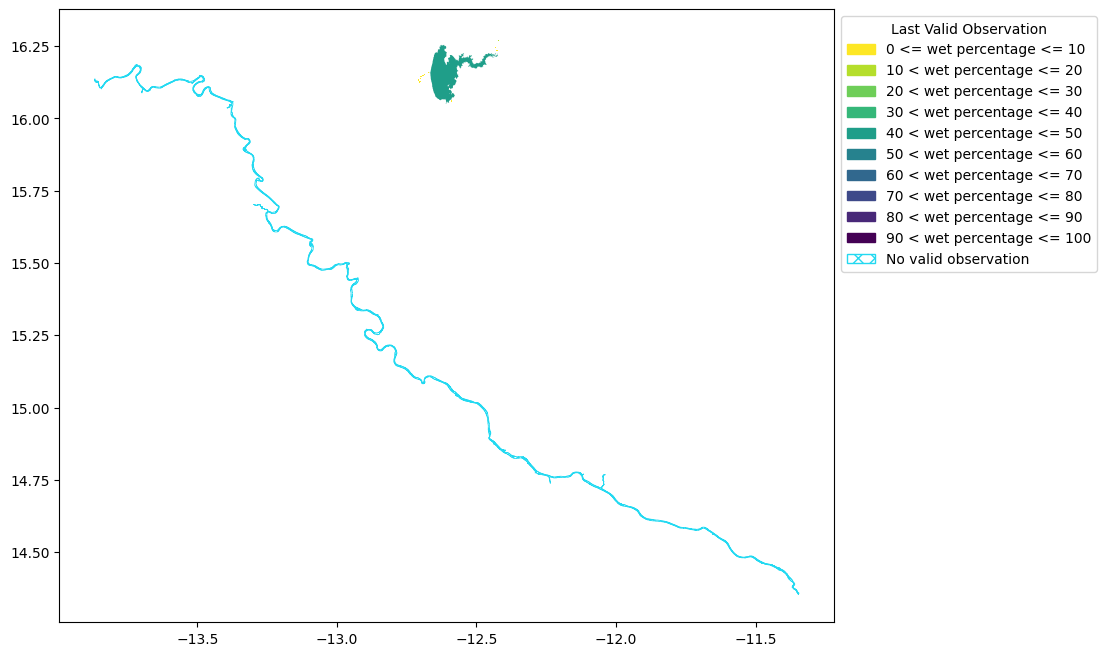

In [ ]:
# Color the waterbody polygons by their last valid observation attribute
plot_last_valid_obs(polygons)

#### Geohashes
Every water body in DE Africa Water Bodies has a unique identifier (UID) called a [_geohash_](https://en.wikipedia.org/wiki/Geohash). The geohash of a water body is derived from its position, and this process can be reversed to obtain the location from the geohash. A waterbody's geohash is contained under the UID attribute and can be obtained through [DE Africa Maps](https://maps.digitalearth.africa/) by clicking on a waterbody.

**Note:** You might notice that these polygons have a range of similar geohash prefixes ('edyg' or 'edz'). If two geohashes have a similar prefix, this means that they are close together.

### Getting data for a specific water body

We can use the `.explore()` function above to interactively explore the subset of water bodies located within the bounding box. Hovering over a water body will display its attributes, including the water body's geohash (UID). After noting the geohash from the `.explore()` function, we can use it to extract just that water body through the `get_waterbody()` function.

By default, try the geohash `edz5cm96jh`.

In [ ]:
selected_waterbody_geohash = "edz5cm96jh"

selected_waterbody = get_waterbody(selected_waterbody_geohash)
selected_waterbody

,id,wb_id,area_m2,length_m,uid,perim_m,last_obs_date,last_valid_obs_date,last_valid_obs,last_attrs_update_date,geometry
0,DEAfrica_Waterbodies.edz5cm96jh,54637,1.865133e+08,28031.685226,edz5cm96jh,252960,2025-08-09,2025-07-24,44.343915,2025-08-12,"POLYGON ((-12.6257 16.2546, -12.6254 16.2546, ..."


#### Plot the selected water body

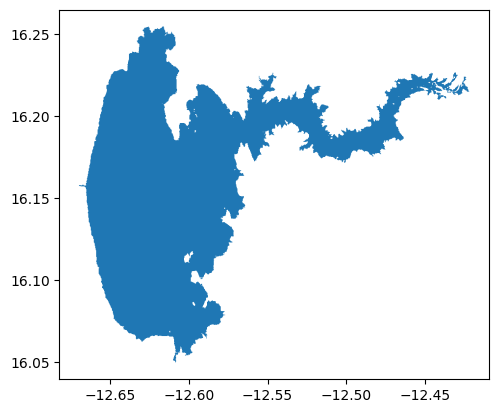

In [ ]:
selected_waterbody.plot();

#### Get the wet surface area time series for the selected waterbody

For any given geohash or a polygon, we can also use the `get_time_series()` function to get various measures of the water body surface over time. See the [Waterbodies Historical Extent documentation](https://docs.digitalearthafrica.org/en/latest/data_specs/Waterbodies_specs.html#Waterbodies-Surface-Area-Change) for descriptions of the different surface measures.

The function also calculates a rolling median of the water body surface wet percentage.
This is used to visualise the overall trend in the surface wet percentage.
The rolling median uses the last three observations to determine the median at a given date.

In [ ]:
# Get time series for the selected water body
selected_waterbody_timeseries = get_time_series(waterbody=selected_waterbody)

selected_waterbody_timeseries.head()

,area_wet_m2,percent_wet,area_dry_m2,percent_dry,area_invalid_m2,percent_invalid,area_observed_m2,percent_observed,percent_wet_rolling_median
date,,,,,,,,,
1984-05-28,39674700.0,21.27,146836800.0,78.73,1800.0,0.00,186513300.0,100.0,NaN
1984-07-15,99504900.0,53.35,87005700.0,46.65,2700.0,0.00,186513300.0,100.0,NaN
1984-08-25,115645500.0,62.00,70864200.0,37.99,3600.0,0.00,186513300.0,100.0,53.35
1984-09-17,123178500.0,66.04,62281800.0,33.39,1053000.0,0.56,186513300.0,100.0,62.00
1984-10-19,132593400.0,71.09,53912700.0,28.91,7200.0,0.00,186513300.0,100.0,66.04


#### Display the wet surface area time series for the selected waterbody

After loading the water body time series, we can use the `display_time_series()` function to create an interactive visualisation of the time series.

The visualisation shows the invalid percentage and the wet percentage.
The invalid percentage indicates the proportion of the water body that couldn't be clearly observed.
To provide the most representative measurements of water body surface area, the time series only contains values where the invalid percentage is lower than 10%.

There are some caveats to be aware of:

* To appear in the time series, an observation must record clear observations of at least 90% of the water body's surface area. If 10% or more of the surface area is covered by cloud or cloud shadow, the observation will be excluded. This can cause large gaps in the time series.
* If the invalid percentage is high, it's likely that the wet percentage is an underestimate of the true wet surface area.
* Annual and seasonal trends should only be inferred during times with sufficient observations. You should take care when infering the surface water change across time when there are few observations.
* The time series is based on the Water Observations from Space product, which has known limitations. See the [DE Africa Waterbodies service documentation](https://docs.digitalearthafrica.org/en/latest/data_specs/Waterbodies_specs.html) for more information.

In [ ]:
display_time_series(selected_waterbody_timeseries)

---

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0).
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to repoart an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:**

In [ ]:
import datacube
print(datacube.__version__)

1.9.7


**Last Tested:**

In [ ]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2025-08-17'

In [ ]:
%pip install deafrica_tools

In [ ]:
%pip install "folium>=0.12" matplotlib mapclassify